In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

#importing platting libraries
import matplotlib.pyplot as plt

from scipy.stats import zscore

import seaborn as sns

In [4]:
wine_df = pd.read_csv("winequality-red.csv")

In [6]:
wine_df_attr = wine_df.iloc[:,0:12]
print(wine_df_attr.shape)
wine_df_attr.head()

(1599, 12)


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
features = ['fixed_acidity', 'volatile_acidity','citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide', 'total_sulfur_dioxide','density','pH','sulphates','alcohol']

C:\Users\rames\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


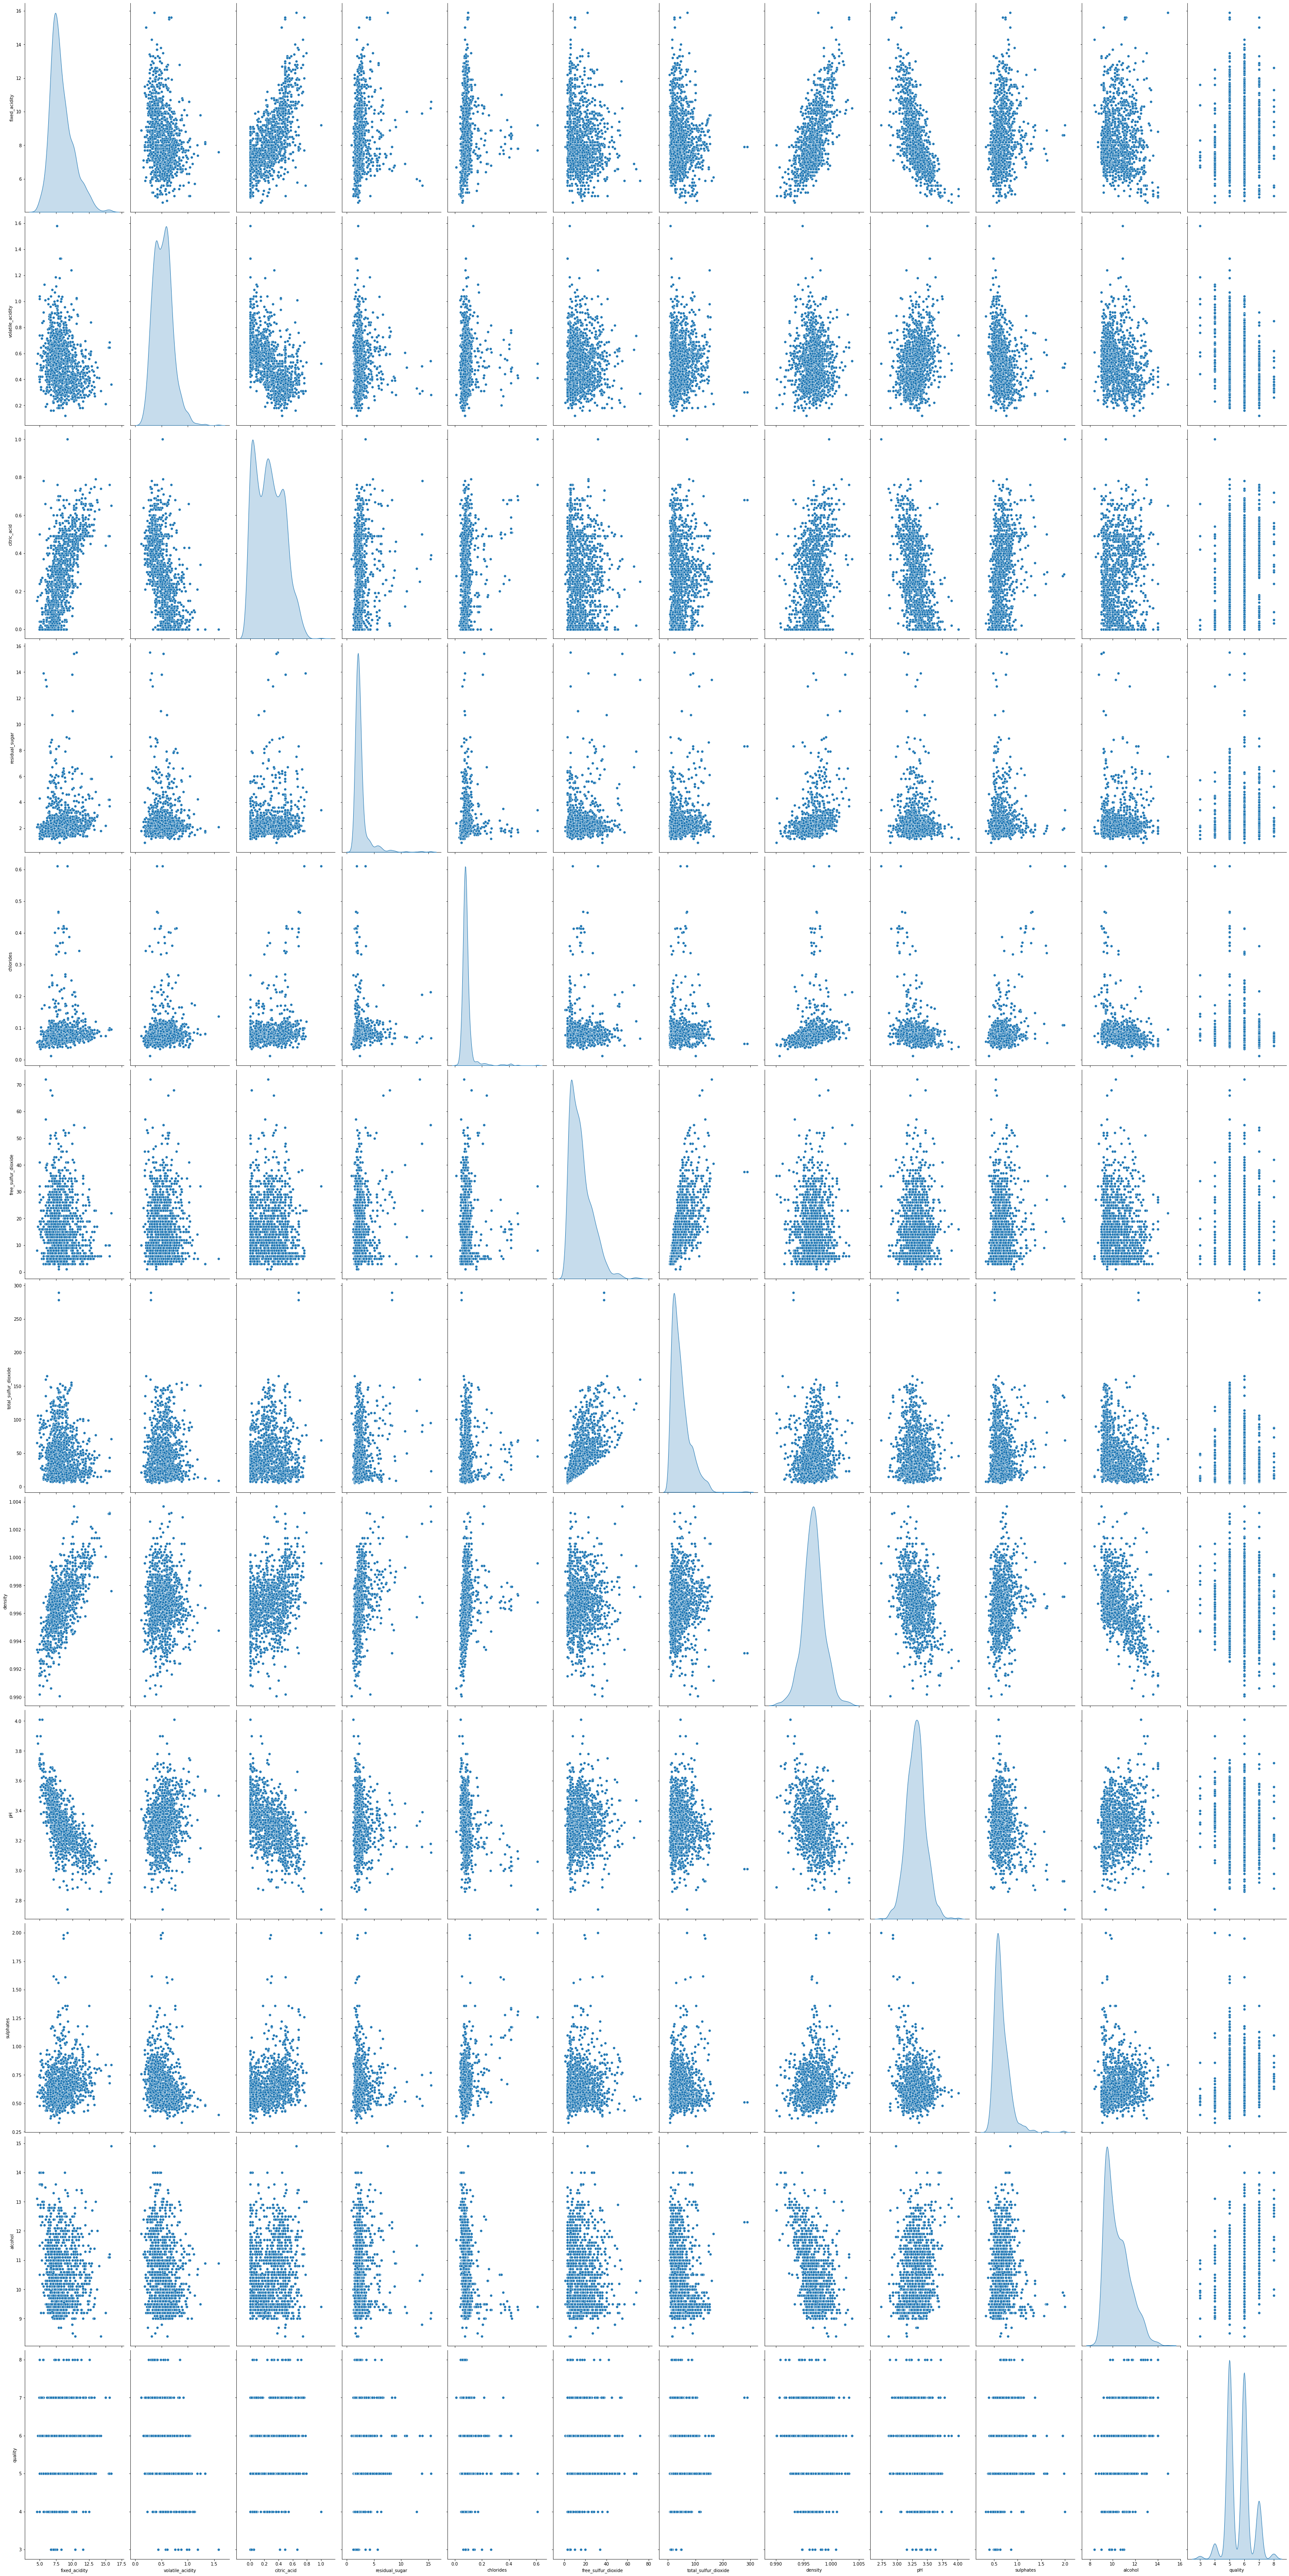

In [8]:
sns.pairplot(wine_df, size=7, aspect=0.5, diag_kind='kde')

In [9]:
from sklearn.cluster import AgglomerativeClustering

model1= AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')

In [10]:
model1.fit(wine_df_attr)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [14]:
wine_df_attr['labels']=model1.labels_
wine_df_attr.groupby(["labels"]).count()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
labels                                                                 
0                  65                65           65              65   
1                   2                 2            2               2   
2                 589               589          589             589   
3                   2                 2            2               2   
4                 185               185          185             185   
5                 756               756          756             756   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density   pH  \
labels                                                                       
0              65                   65                    65       65   65   
1               2                    2                     2        2    2   
2             589                  589                   589      589  589   
3               2                    2                     2        2    2   
4             185                  185                   185      185  185   
5             756                  756                   756      756  756   

        sulphates  alcohol  quality  
labels                               
0              65       65       65  
1               2        2        2  
2             589      589      589  
3               2        2        2  
4             185      185      185  
5             756      756      756

In [15]:
wine_clusters = wine_df_attr.groupby(["labels"])

In [17]:
wine_clusters.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
16              8.5             0.280         0.56             1.8      0.092   
30              6.7             0.675         0.07             2.4      0.089   
32              8.3             0.655         0.12             2.3      0.083   
53              8.6             0.380         0.36             3.0      0.081   
79              8.3             0.625         0.20             1.5      0.080   
86              8.6             0.490         0.28             1.9      0.110   
354             6.1             0.210         0.40             1.4      0.066   
1079            7.9             0.300         0.68             8.3      0.050   
1081            7.9             0.300         0.68             8.3      0.050   
1244            5.9             0.290         0.25            13.4      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
6                    15.0                  59.0  0.99640  3.30       0.46   
7                    15.0                  21.0  0.99460  3.39       0.47   
8                     9.0                  18.0  0.99680  3.36       0.57   
9                    17.0                 102.0  0.99780  3.35       0.80   
11                   17.0                 102.0  0.99780  3.35       0.80   
13                    9.0                  29.0  0.99740  3.26       1.56   
14                   52.0                 145.0  0.99860  3.16       0.88   
15                   51.0                 148.0  0.99860  3.17       0.93   
16                   35.0                 103.0  0.99690  3.30       0.75   
30                   17.0                  82.0  0.99580  3.35       0.54   
32                   15.0                 113.0  0.99660  3.17       0.66   
53                   30.0                 119.0  0.99700  3.20       0.56   
79                   27.0                 119.0  0.99720  3.16       1.12   
86                   20.0                 136.0  0.99720  2.93       1.95   
354                  40.5                 165.0  0.99120  3.25       0.59   
1079                 37.5                 278.0  0.99316  3.01       0.51   
1081                 37.5                 289.0  0.99316  3.01       0.51   
1244                 72.0                 160.0  0.99721  3.33       0.54   

      alcohol  quality  labels  
0         9.4        

In [18]:
wine_clusters= wine_df_attr.groupby(['labels'])

In [22]:
wine_groups = wine_clusters.head(1599)# this Creates a pandas dataframe group by objects 

In [21]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [23]:
from scipy.spatial.distance import pdist #pairwise distribution between data points

In [24]:
#cophenet index is a measure of correlation between the distance of points in feature space and disctance on dendogram 
# the closer it is to 1, the better the clustering 

z= linkage(wine_df_attr, 'average')

c, coph_dists = cophenet(z, pdist(wine_df_attr))
c

0.8333815767944764

In [29]:
z.shape

(1598, 4)

In [32]:

z[1]
z[1:10]

array([[ 787.,  788.,    0.,    2.],
       [ 318.,  320.,    0.,    2.],
       [ 135.,  140.,    0.,    2.],
       [ 422.,  424.,    0.,    2.],
       [ 434.,  438.,    0.,    2.],
       [1352., 1353.,    0.,    2.],
       [ 118.,  121.,    0.,    2.],
       [1229., 1232.,    0.,    2.],
       [ 641.,  643.,    0.,    2.]])

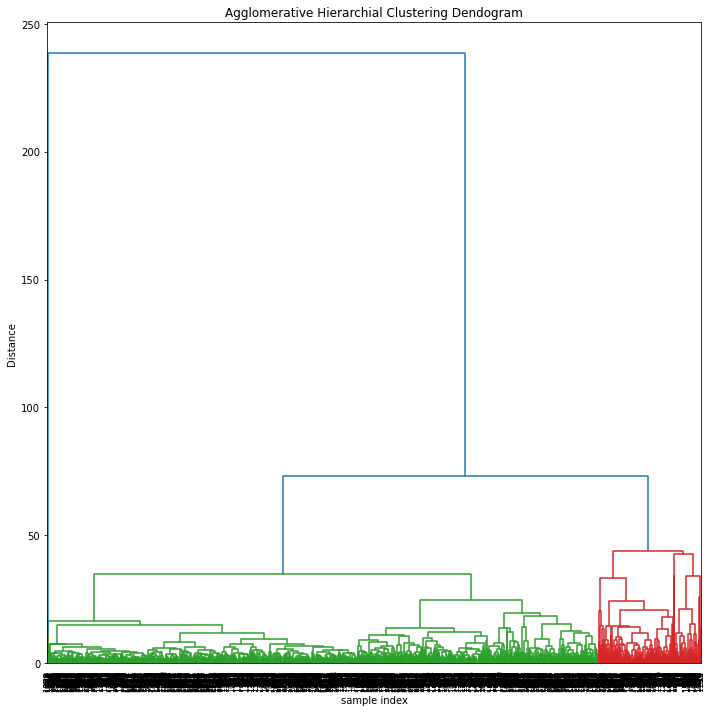

In [38]:
plt.figure(figsize=(10,10))
plt.title("Agglomerative Hierarchial Clustering Dendogram")
plt.xlabel('sample index')
plt.ylabel ('Distance')
dendrogram(z, leaf_rotation=90,color_threshold=60, leaf_font_size=8 )
plt.tight_layout()

In [39]:
z= linkage(wine_df_attr, 'complete')
c, coph_dists = cophenet(z, pdist(wine_df_attr))
c

0.8387870482249878

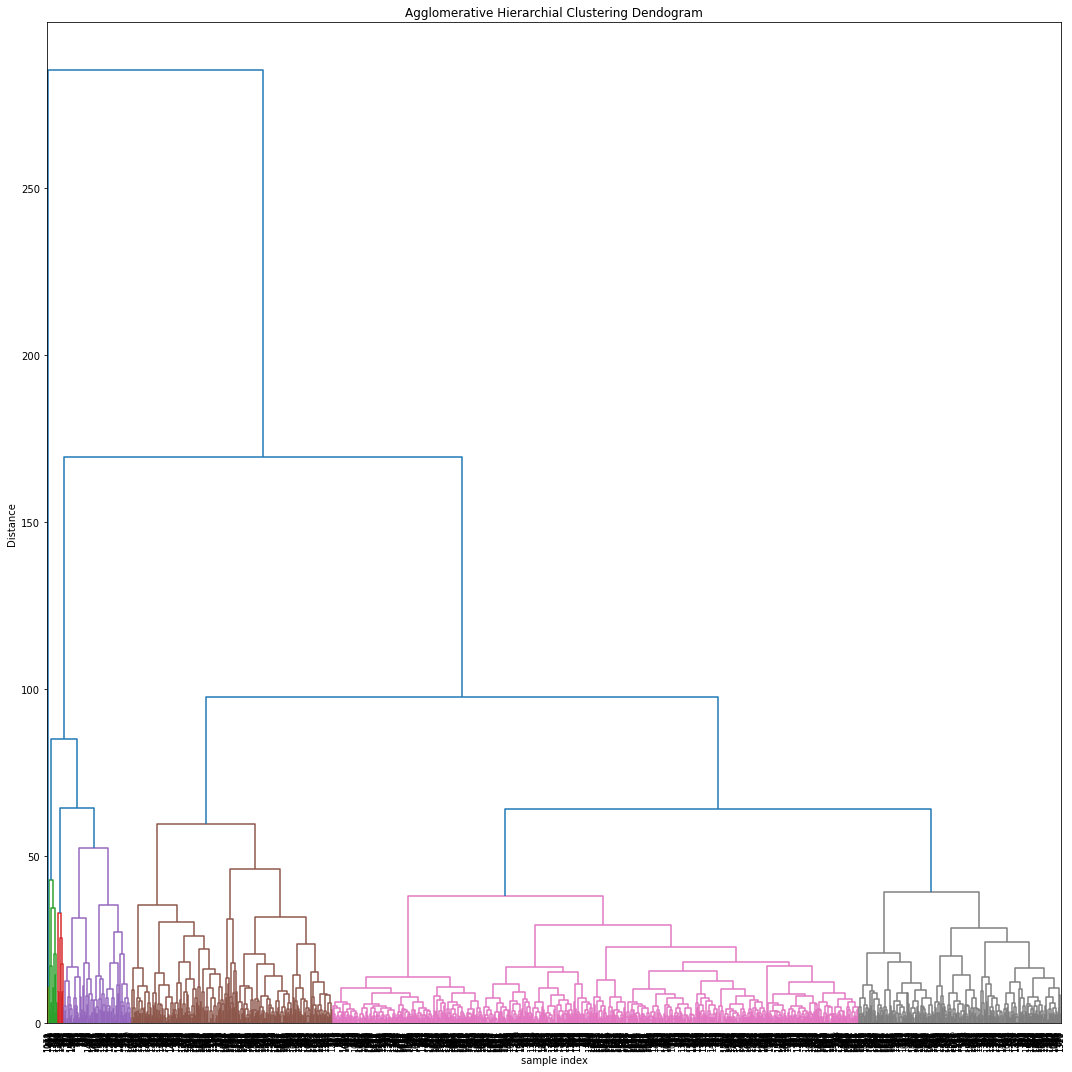

In [40]:
plt.figure(figsize=(15,15))
plt.title("Agglomerative Hierarchial Clustering Dendogram")
plt.xlabel('sample index')
plt.ylabel ('Distance')
dendrogram(z, leaf_rotation=90,color_threshold=60, leaf_font_size=8 )
plt.tight_layout()

In [41]:
z= linkage(wine_df_attr, 'ward')
c, coph_dists = cophenet(z, pdist(wine_df_attr))
c

0.6688164031714893

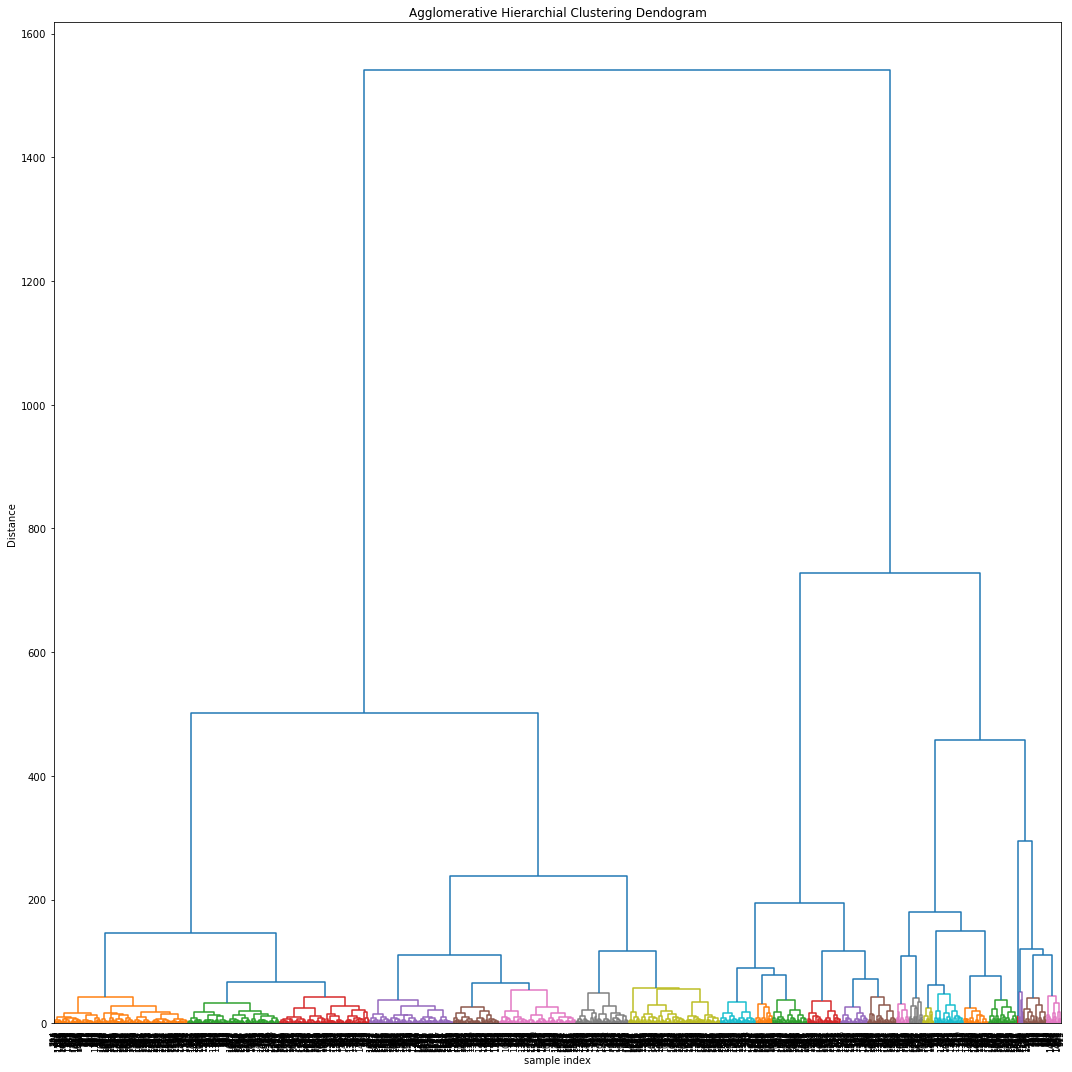

In [42]:
plt.figure(figsize=(15,15))
plt.title("Agglomerative Hierarchial Clustering Dendogram")
plt.xlabel('sample index')
plt.ylabel ('Distance')
dendrogram(z, leaf_rotation=90,color_threshold=60, leaf_font_size=8 )
plt.tight_layout()